# 1. Sensor Data Exploration

In [1]:
from datetime import datetime
import random

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ANON_HIGH_RES_DATASET = "../data/Anonymized High Resolution Dataset (8 Days).csv"
COMB_DATA_SEG_RES_DATASET = "../data/Combined Data Segmentation Results (High Resolution Data of 8 Days).csv"

## 1.1 Import datasets

In [3]:
df_anon_high_res = pd.read_csv(ANON_HIGH_RES_DATASET, sep=';')

In [4]:
df_comb_data_seg_res = pd.read_csv(COMB_DATA_SEG_RES_DATASET, sep=';')

## 1.2 Preprocess data

### 1.2.1 Prepare data

**Rename columns**

In [5]:
df_anon_high_res = df_anon_high_res.rename(columns={
    "TS": "timestamp",
    "Tag": "sensor_tag",
    "Value": "value",
    "Sensor Type": "sensor_type",
    "Equipment Type": "equipment_type",
})

In [6]:
df_comb_data_seg_res = df_comb_data_seg_res.rename(columns={
    "Sensor": "sensor_tag",
    "Mode": "mode",
    "Start": "start",
    "End": "end",
})

**Set categorical values**

In [7]:
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].str.split(" ").apply(lambda x: f"{x[0].upper()}_{x[1].zfill(2)}")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].str.upper()
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].str.upper()

In [8]:
df_comb_data_seg_res["sensor_tag"] = df_comb_data_seg_res["sensor_tag"].str.split(" ").apply(lambda x: f"{x[0].upper()}_{x[1].zfill(2)}")
df_comb_data_seg_res["mode"] = df_comb_data_seg_res["mode"].str.upper()

**Set data types**

In [9]:
df_anon_high_res["timestamp"] = pd.to_datetime(df_anon_high_res["timestamp"])
df_anon_high_res["sensor_tag"] = df_anon_high_res["sensor_tag"].astype("category")
df_anon_high_res["value"] = df_anon_high_res["value"].astype("float")
df_anon_high_res["sensor_type"] = df_anon_high_res["sensor_type"].astype("category")
df_anon_high_res["equipment_type"] = df_anon_high_res["equipment_type"].astype("category")

In [10]:
df_comb_data_seg_res["sensor_tag"] = df_comb_data_seg_res["sensor_tag"].astype("category")
df_comb_data_seg_res["mode"] = df_comb_data_seg_res["mode"].astype("category")
df_comb_data_seg_res["start"] = pd.to_datetime(df_comb_data_seg_res["start"])
df_comb_data_seg_res["end"] = pd.to_datetime(df_comb_data_seg_res["end"])
df_comb_data_seg_res["duration"] = pd.to_timedelta(df_comb_data_seg_res["duration"])

### 1.2.2 Clean data

**Remove duplicate rows**

In [11]:
print(f"Rows (Before): {df_anon_high_res.shape[0]}")
df_anon_high_res = df_anon_high_res.drop_duplicates()
print(f"Rows (After): {df_anon_high_res.shape[0]}")

Rows (Before): 1416864
Rows (After): 1416786


In [12]:
print(f"Rows (Before): {df_comb_data_seg_res.shape[0]}")
df_comb_data_seg_res = df_comb_data_seg_res.drop_duplicates()
print(f"Rows (After): {df_comb_data_seg_res.shape[0]}")

Rows (Before): 643
Rows (After): 643


**Reset index**

In [13]:
df_anon_high_res = df_anon_high_res.reset_index(drop=True)

In [14]:
df_comb_data_seg_res = df_comb_data_seg_res.reset_index(drop=True)

**Sort rows**

In [15]:
df_anon_high_res = df_anon_high_res.sort_values(["sensor_tag", "timestamp"])

In [16]:
df_comb_data_seg_res = df_comb_data_seg_res.sort_values(["sensor_tag", "start", "end"])

## 1.3 Explore data

### 1.3.1 Inspect rows

In [17]:
df_anon_high_res.head(10)

timestamp sensor_tag  value sensor_type equipment_type
8164 2022-01-24 00:00:15  SENSOR_01    0.0        FLOW           PUMP
7940 2022-01-24 00:02:15  SENSOR_01    0.0        FLOW           PUMP
7524 2022-01-24 00:04:15  SENSOR_01    0.0        FLOW           PUMP
7482 2022-01-24 00:06:15  SENSOR_01    0.0        FLOW           PUMP
7892 2022-01-24 00:08:15  SENSOR_01    0.0        FLOW           PUMP
7734 2022-01-24 00:10:15  SENSOR_01    0.0        FLOW           PUMP
7686 2022-01-24 00:12:15  SENSOR_01    0.0        FLOW           PUMP
7780 2022-01-24 00:14:15  SENSOR_01    0.0        FLOW           PUMP
7393 2022-01-24 00:16:15  SENSOR_01    0.0        FLOW           PUMP
7527 2022-01-24 00:18:15  SENSOR_01    0.0        FLOW           PUMP

In [18]:
df_comb_data_seg_res.head(10)

sensor_tag   mode               start                 end  \
3   SENSOR_21_SMA_3  GREEN 2022-01-24 11:32:00 2022-01-24 11:51:00   
4   SENSOR_21_SMA_3  GREEN 2022-01-24 12:19:00 2022-01-24 16:23:00   
5   SENSOR_21_SMA_3  GREEN 2022-01-24 16:32:00 2022-01-24 17:11:00   
6   SENSOR_21_SMA_3  GREEN 2022-01-24 17:14:00 2022-01-24 17:30:00   
7   SENSOR_21_SMA_3  GREEN 2022-01-24 17:33:00 2022-01-24 17:47:00   
8   SENSOR_21_SMA_3  GREEN 2022-01-24 17:48:00 2022-01-24 18:04:00   
9   SENSOR_21_SMA_3  GREEN 2022-01-24 18:07:00 2022-01-24 18:34:00   
10  SENSOR_21_SMA_3  GREEN 2022-01-24 19:26:00 2022-01-24 19:51:00   
11  SENSOR_21_SMA_3  GREEN 2022-01-24 20:01:00 2022-01-24 20:13:00   
12  SENSOR_21_SMA_3  GREEN 2022-01-24 20:48:00 2022-01-24 21:03:00   

          duration  
3  0 days 00:18:40  
4  0 days 04:04:30  
5  0 days 00:38:45  
6  0 days 00:16:20  
7  0 days 00:14:05  
8  0 days 00:16:20  
9  0 days 00:27:25  
10 0 days 00:24:35  
11 0 days 00:11:55  
12 0 days 00:15:10

### 1.3.2 Inspect data types

In [19]:
df_anon_high_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416786 entries, 8164 to 1397533
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   timestamp       1416786 non-null  datetime64[ns]
 1   sensor_tag      1416786 non-null  category      
 2   value           1393746 non-null  float64       
 3   sensor_type     1416786 non-null  category      
 4   equipment_type  1359539 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 36.5 MB


In [20]:
df_comb_data_seg_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 3 to 642
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   sensor_tag  643 non-null    category       
 1   mode        643 non-null    category       
 2   start       643 non-null    datetime64[ns] 
 3   end         643 non-null    datetime64[ns] 
 4   duration    643 non-null    timedelta64[ns]
dtypes: category(2), datetime64[ns](2), timedelta64[ns](1)
memory usage: 21.8 KB


### 1.3.3 Inspect basic statistics

In [21]:
df_anon_high_res.describe(include="all")

/tmp/ipykernel_103028/450524285.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res.describe(include="all")


timestamp sensor_tag         value sensor_type  \
count               1416786    1416786  1.393746e+06     1416786   
unique               324960         69           NaN          10   
top     2022-01-24 17:13:57  SENSOR_03           NaN        FLOW   
freq                     91      86329           NaN      627956   
first   2022-01-24 00:00:04        NaN           NaN         NaN   
last    2022-01-31 23:59:57        NaN           NaN         NaN   
mean                    NaN        NaN  1.736672e+03         NaN   
std                     NaN        NaN  7.715267e+03         NaN   
min                     NaN        NaN -4.476077e+02         NaN   
25%                     NaN        NaN  3.643755e+01         NaN   
50%                     NaN        NaN  7.165625e+01         NaN   
75%                     NaN        NaN  2.374741e+02         NaN   
max                     NaN        NaN  1.020160e+05         NaN   

       equipment_type  
count         1359539  
unique              4  
top              PUMP  
freq           558099  
first             NaN  
last              NaN  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

In [22]:
df_comb_data_seg_res.describe(include="all")

/tmp/ipykernel_103028/2503908724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comb_data_seg_res.describe(include="all")
/tmp/ipykernel_103028/2503908724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comb_data_seg_res.describe(include="all")


sensor_tag   mode                start                  end  \
count               643    643                  643                  643   
unique                4      6                  457                  504   
top     SENSOR_41_SMA_3  GREEN  2022-01-26 02:19:00  2022-01-25 11:44:00   
freq                199    192                    4                    4   
first               NaN    NaN  2022-01-24 00:00:00  2022-01-24 09:24:00   
last                NaN    NaN  2022-01-31 22:50:00  2022-01-31 23:23:00   
mean                NaN    NaN                  NaN                  NaN   
std                 NaN    NaN                  NaN                  NaN   
min                 NaN    NaN                  NaN                  NaN   
25%                 NaN    NaN                  NaN                  NaN   
50%                 NaN    NaN                  NaN                  NaN   
75%                 NaN    NaN                  NaN                  NaN   
max                 NaN    NaN                  NaN                  NaN   

                         duration  
count                         643  
unique                        NaN  
top                           NaN  
freq                          NaN  
first                         NaN  
last                          NaN  
mean    0 days 00:43:58.522550544  
std     0 days 02:35:36.666817905  
min               0 days 00:00:20  
25%               0 days 00:14:45  
50%               0 days 00:20:20  
75%               0 days 00:36:20  
max               1 days 16:08:00

### 1.3.4 Inspect missing data

In [23]:
df_anon_high_res_percent_missing = df_anon_high_res.isnull().sum() * 100 / len(df_anon_high_res)

df_anon_high_res_missing_data = pd.DataFrame({"PERCENT_MISSING": df_anon_high_res_percent_missing}, index=df_anon_high_res.columns)
df_anon_high_res_missing_data

PERCENT_MISSING
timestamp              0.000000
sensor_tag             0.000000
value                  1.626216
sensor_type            0.000000
equipment_type         4.040624

In [24]:
df_comb_data_seg_res_percent_missing = df_comb_data_seg_res.isnull().sum() * 100 / len(df_comb_data_seg_res)

df_comb_data_seg_res_missing_data = pd.DataFrame({"PERCENT_MISSING": df_comb_data_seg_res_percent_missing}, index=df_comb_data_seg_res.columns)
df_comb_data_seg_res_missing_data

PERCENT_MISSING
sensor_tag              0.0
mode                    0.0
start                   0.0
end                     0.0
duration                0.0

### 1.3.5 Inspect data overview

In [25]:
def display_overview(df, subset=None, start=None, end=None):
    sensor_tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    sensor_start = start or df["timestamp"].min()
    sensor_end = end or df["timestamp"].max()
    sensor_overview = pd.DataFrame()

    for sensor_tag in sensor_tags:
        sensor_subset = df[(df["sensor_tag"] == sensor_tag) & (df["timestamp"] >= sensor_start) & (df["timestamp"] <= sensor_end)]

        sensor_overview = pd.concat([sensor_overview, pd.DataFrame([{
            "SENSOR_TAG": sensor_tag,
            "SENSOR_TYPE": sensor_subset["sensor_type"].iloc[0],
            "EQUIPMENT_TYPE": sensor_subset["equipment_type"].iloc[0],
            "VALUE_MEAN": sensor_subset["value"].mean(),
            "VALUE_STD": sensor_subset["value"].std(),
            "VALUE_MIN": sensor_subset["value"].min(),
            "VALUE_25": sensor_subset["value"].quantile(0.25),
            "VALUE_50": sensor_subset["value"].quantile(0.50),
            "VALUE_75": sensor_subset["value"].quantile(0.75),
            "VALUE_MAX": sensor_subset["value"].max(),
            "TIMESTAMP_INTERVAL": (sensor_subset["timestamp"].max() - sensor_subset["timestamp"].min()) / len(sensor_subset),
        }])], ignore_index=True)

    with pd.option_context("display.max_rows", 70, "display.max_columns", 20):
        display(sensor_overview)


def plot_overview(df, subset=None, start=None, end=None, kind="line", normalize=False):
    sensor_tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    sensor_colors = plt.cm.get_cmap("tab20").colors
    sensor_start = start or df["timestamp"].min()
    sensor_end = end or df["timestamp"].max()

    fig, axes = plt.subplots(
        len(sensor_tags),
        1,
        figsize=(24, len(sensor_tags)),
        sharex=True,
        sharey=False,
    )

    for idx, sensor_tag in enumerate(sensor_tags):
        sensor_subset = df[(df["sensor_tag"] == sensor_tag) & (df["timestamp"] >= sensor_start) & (df["timestamp"] <= sensor_end)]

        if normalize:
            scaler = MinMaxScaler()
            sensor_values = scaler.fit_transform(sensor_subset["value"].to_numpy().reshape(-1, 1))
        else:
            sensor_values = sensor_subset["value"]

        fig.add_subplot(axes[idx])

        if kind == "line":
            plt.plot(
                sensor_subset["timestamp"],
                sensor_values,
                color=sensor_colors[idx % len(sensor_colors)],
                label=sensor_tag.split("_")[1],
                marker=".",
            )
            plt.legend(loc="upper right")
        elif kind == "scatter":
            plt.scatter(
                sensor_subset["timestamp"],
                sensor_values,
                color=sensor_colors[idx % len(sensor_colors)],
                label=sensor_tag.split("_")[1],
                marker=".",
            )
            plt.legend(loc="upper right")
        else:
            raise ValueError("'kind' must be either 'line' or 'scatter'")

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.07)
    plt.margins(x=0, y=0)
    plt.show()


def plot_correlation(df, subset=None, start=None, end=None, freq=None):
    sensor_tags = [tag for tag in df["sensor_tag"].unique() if subset is None or tag in subset]
    sensor_start = start or df["timestamp"].min()
    sensor_end = end or df["timestamp"].max()

    sensor_subset = df[df["sensor_tag"].isin(sensor_tags) & (df["timestamp"] >= sensor_start) & (df["timestamp"] <= sensor_end)]

    sensor_pivot = sensor_subset.pivot_table(
        index="timestamp",
        columns="sensor_tag",
        values="value",
    )
    sensor_pivot = sensor_pivot.reset_index()
    sensor_pivot = sensor_pivot.groupby("timestamp" if not freq else pd.Grouper(key="timestamp", freq=freq)).mean()

    _, ax = plt.subplots(figsize=(24, 24))

    sns.heatmap(
        sensor_pivot.corr(),
        vmax=1.0,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        cbar=False,
        square=True,
        annot=True,
        ax=ax,
        linewidths=0.1,
        linecolor="white",
    )

    plt.tight_layout()
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

In [26]:
display_overview(
    df_anon_high_res,
    subset=None,
    start=None,
    end=None,
)

SENSOR_TAG  SENSOR_TYPE EQUIPMENT_TYPE     VALUE_MEAN    VALUE_STD  \
0   SENSOR_01         FLOW           PUMP     254.039801   213.798703   
1   SENSOR_02         FLOW           PUMP     457.976133    24.425624   
2   SENSOR_03      PRODUCT        PRODUCT   15119.904111  8659.291084   
3   SENSOR_04      PRODUCT        PRODUCT       0.000000     0.000000   
4   SENSOR_05      PRODUCT        PRODUCT       0.343079     0.066350   
5   SENSOR_06      PRODUCT        PRODUCT       0.886561     0.004246   
6   SENSOR_07      PRODUCT        PRODUCT  101164.827083   932.743368   
7   SENSOR_08      PRODUCT        PRODUCT       0.000000     0.000000   
8   SENSOR_09      PRODUCT        PRODUCT       0.000000     0.000000   
9   SENSOR_10      PRODUCT        PRODUCT       3.854788     0.123635   
10  SENSOR_11      PRODUCT        PRODUCT       1.745123     0.056359   
11  SENSOR_12      PRODUCT        PRODUCT       0.000000     0.000000   
12  SENSOR_13      PRODUCT        PRODUCT       3.726745     0.191763   
13  SENSOR_14         CODE        PRODUCT       1.333333     0.577350   
14  SENSOR_15  TEMPERATURE            NaN      62.329172     4.900869   
15  SENSOR_16         FLOW           PUMP     116.711010     8.620807   
16  SENSOR_17      CURRENT           PUMP            NaN          NaN   
17  SENSOR_18         RATE           PUMP            NaN          NaN   
18  SENSOR_19      CURRENT           PUMP            NaN          NaN   
19  SENSOR_20         RATE           PUMP            NaN          NaN   
20  SENSOR_21   PERCENTAGE           TANK      68.565103    18.318489   
21  SENSOR_22      CURRENT          MIXER     198.572125    69.783593   
22  SENSOR_23    FREQUENCY          MIXER      28.979075    25.876251   
23  SENSOR_24  TEMPERATURE          MIXER      57.239544     6.123243   
24  SENSOR_25         FLOW          MIXER       9.028498     6.820467   
25  SENSOR_26         FLOW          MIXER    4802.340139  1896.665447   
26  SENSOR_27         FLOW          MIXER    4153.463390  2217.889060   
27  SENSOR_28         FLOW          MIXER      37.828410     1.619160   
28  SENSOR_29         FLOW           PUMP       0.650473     0.476860   
29  SENSOR_30  TEMPERATURE           PUMP      94.921636     7.020749   
30  SENSOR_31         CODE          MIXER       0.027482     0.163497   
31  SENSOR_32         CODE          MIXER       0.027482     0.163497   
32  SENSOR_33         CODE          MIXER       0.027482     0.163497   
33  SENSOR_34         CODE          MIXER       0.027482     0.163497   
34  SENSOR_35         CODE          MIXER       0.983221     0.128454   
35  SENSOR_36         CODE          MIXER       0.983221     0.128454   
36  SENSOR_37         CODE          MIXER       0.983221     0.128454   
37  SENSOR_38         CODE          MIXER       0.983221     0.128454   
38  SENSOR_39     PRESSURE          MIXER      20.362232    21.737890   
39  SENSOR_40         FLOW          MIXER       5.762108     2.380745   
40  SENSOR_41     PRESSURE          MIXER      53.176436    26.836556   
41  SENSOR_42  TEMPERATURE          MIXER      74.416206    21.514069   
42  SENSOR_43     PRESSURE          MIXER      34.367751    16.200434   
43  SENSOR_44  TEMPERATURE          MIXER      83.054204    16.831183   
44  SENSOR_45    FREQUENCY           TANK     -31.117301    29.140749   
45  SENSOR_46    FREQUENCY           TANK     100.000000     0.000000   
46  SENSOR_47         FLOW           PUMP      41.472677     2.039647   
47  SENSOR_48         FLOW           PUMP     211.418785    14.346111   
48  SENSOR_49         FLOW           PUMP     160.267946    89.347305   
49  SENSOR_50         FLOW           PUMP      64.000000     0.000000   
50  SENSOR_51         FLOW           PUMP      36.742205     2.518027   
51  SENSOR_52         FLOW           PUMP     211.409190    14.288019   
52  SENSOR_53         FLOW           PUMP     153.058157    91.882566   
53  SENSOR_54         FLOW           PUMP      59.000000     

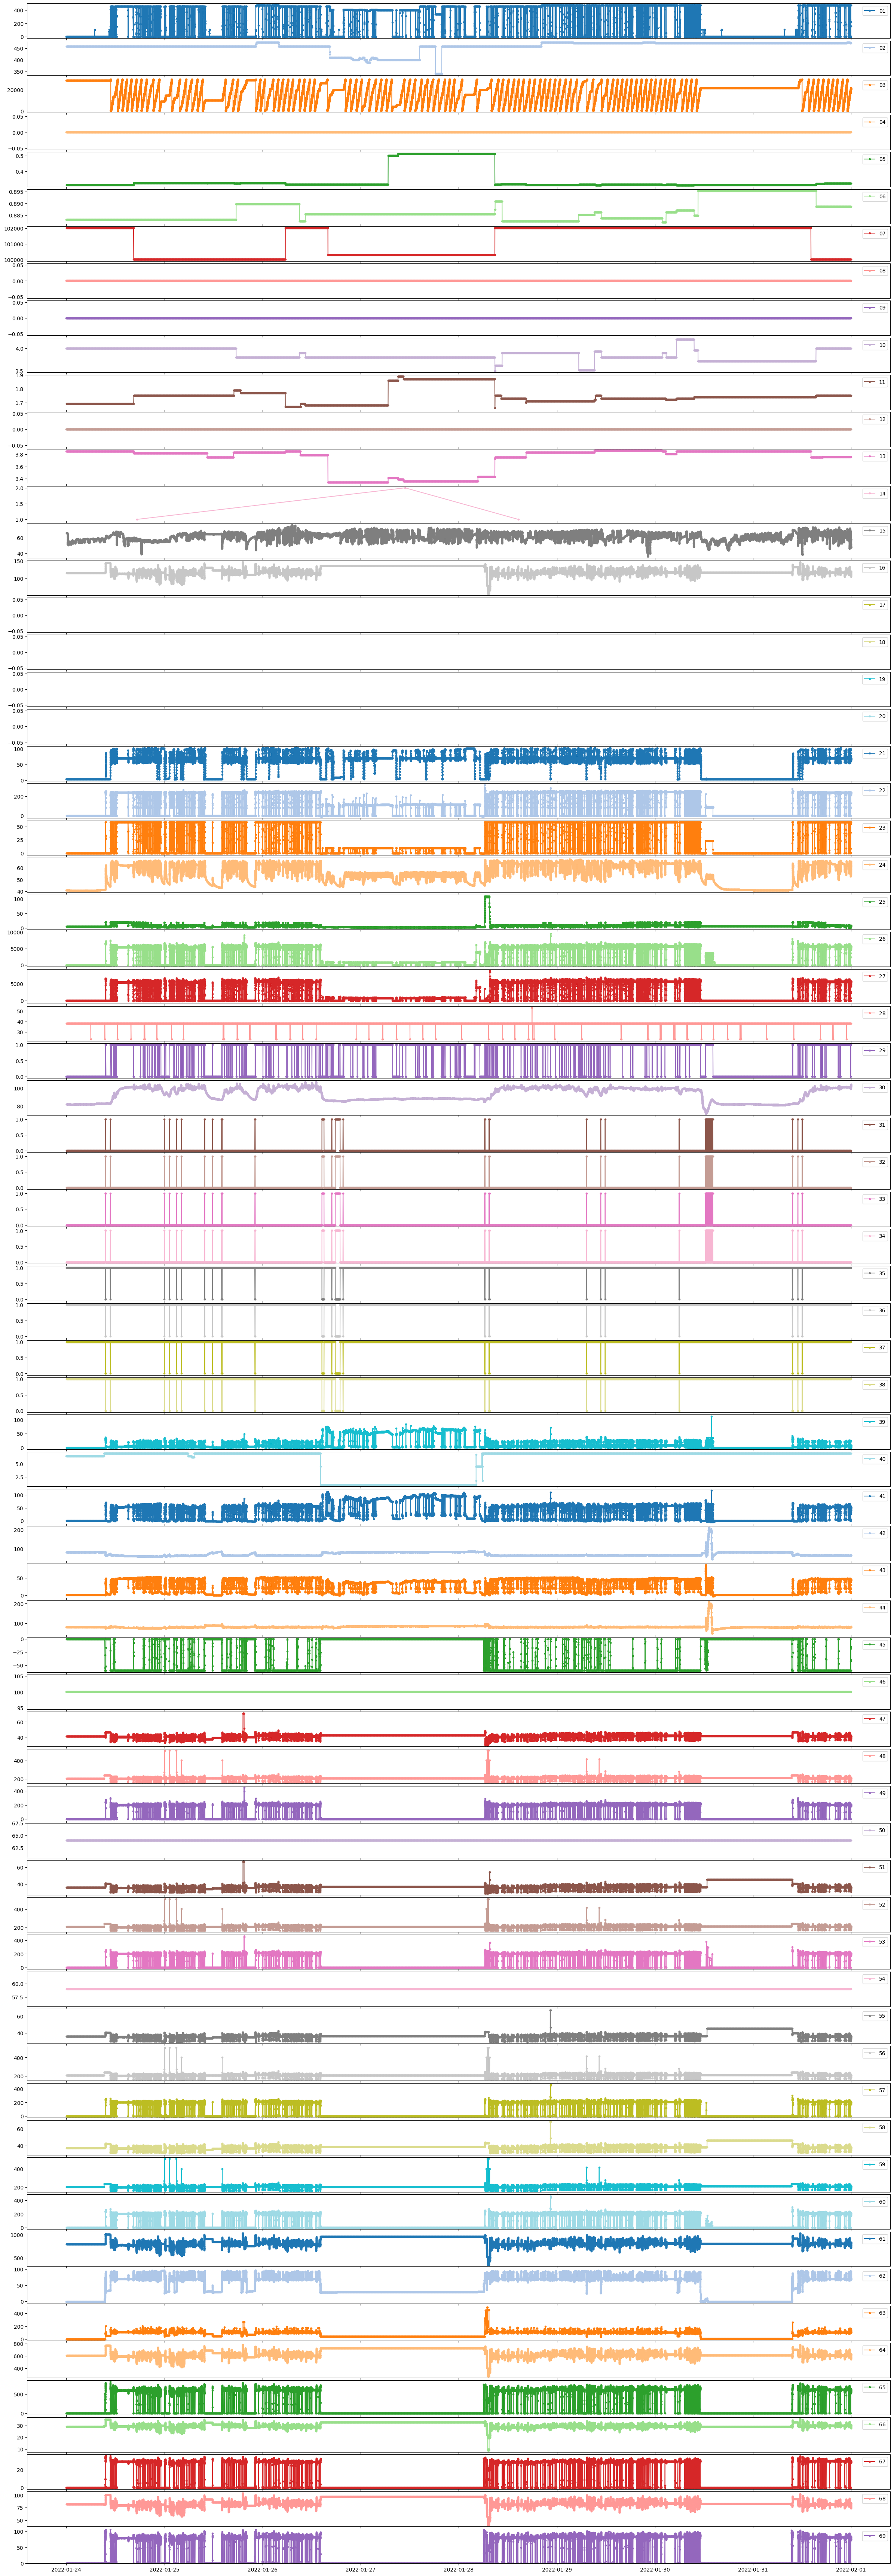

In [27]:
plot_overview(
    df_anon_high_res,
    subset=None,
    start=None,
    end=None,
    kind="line",
    normalize=False,
)

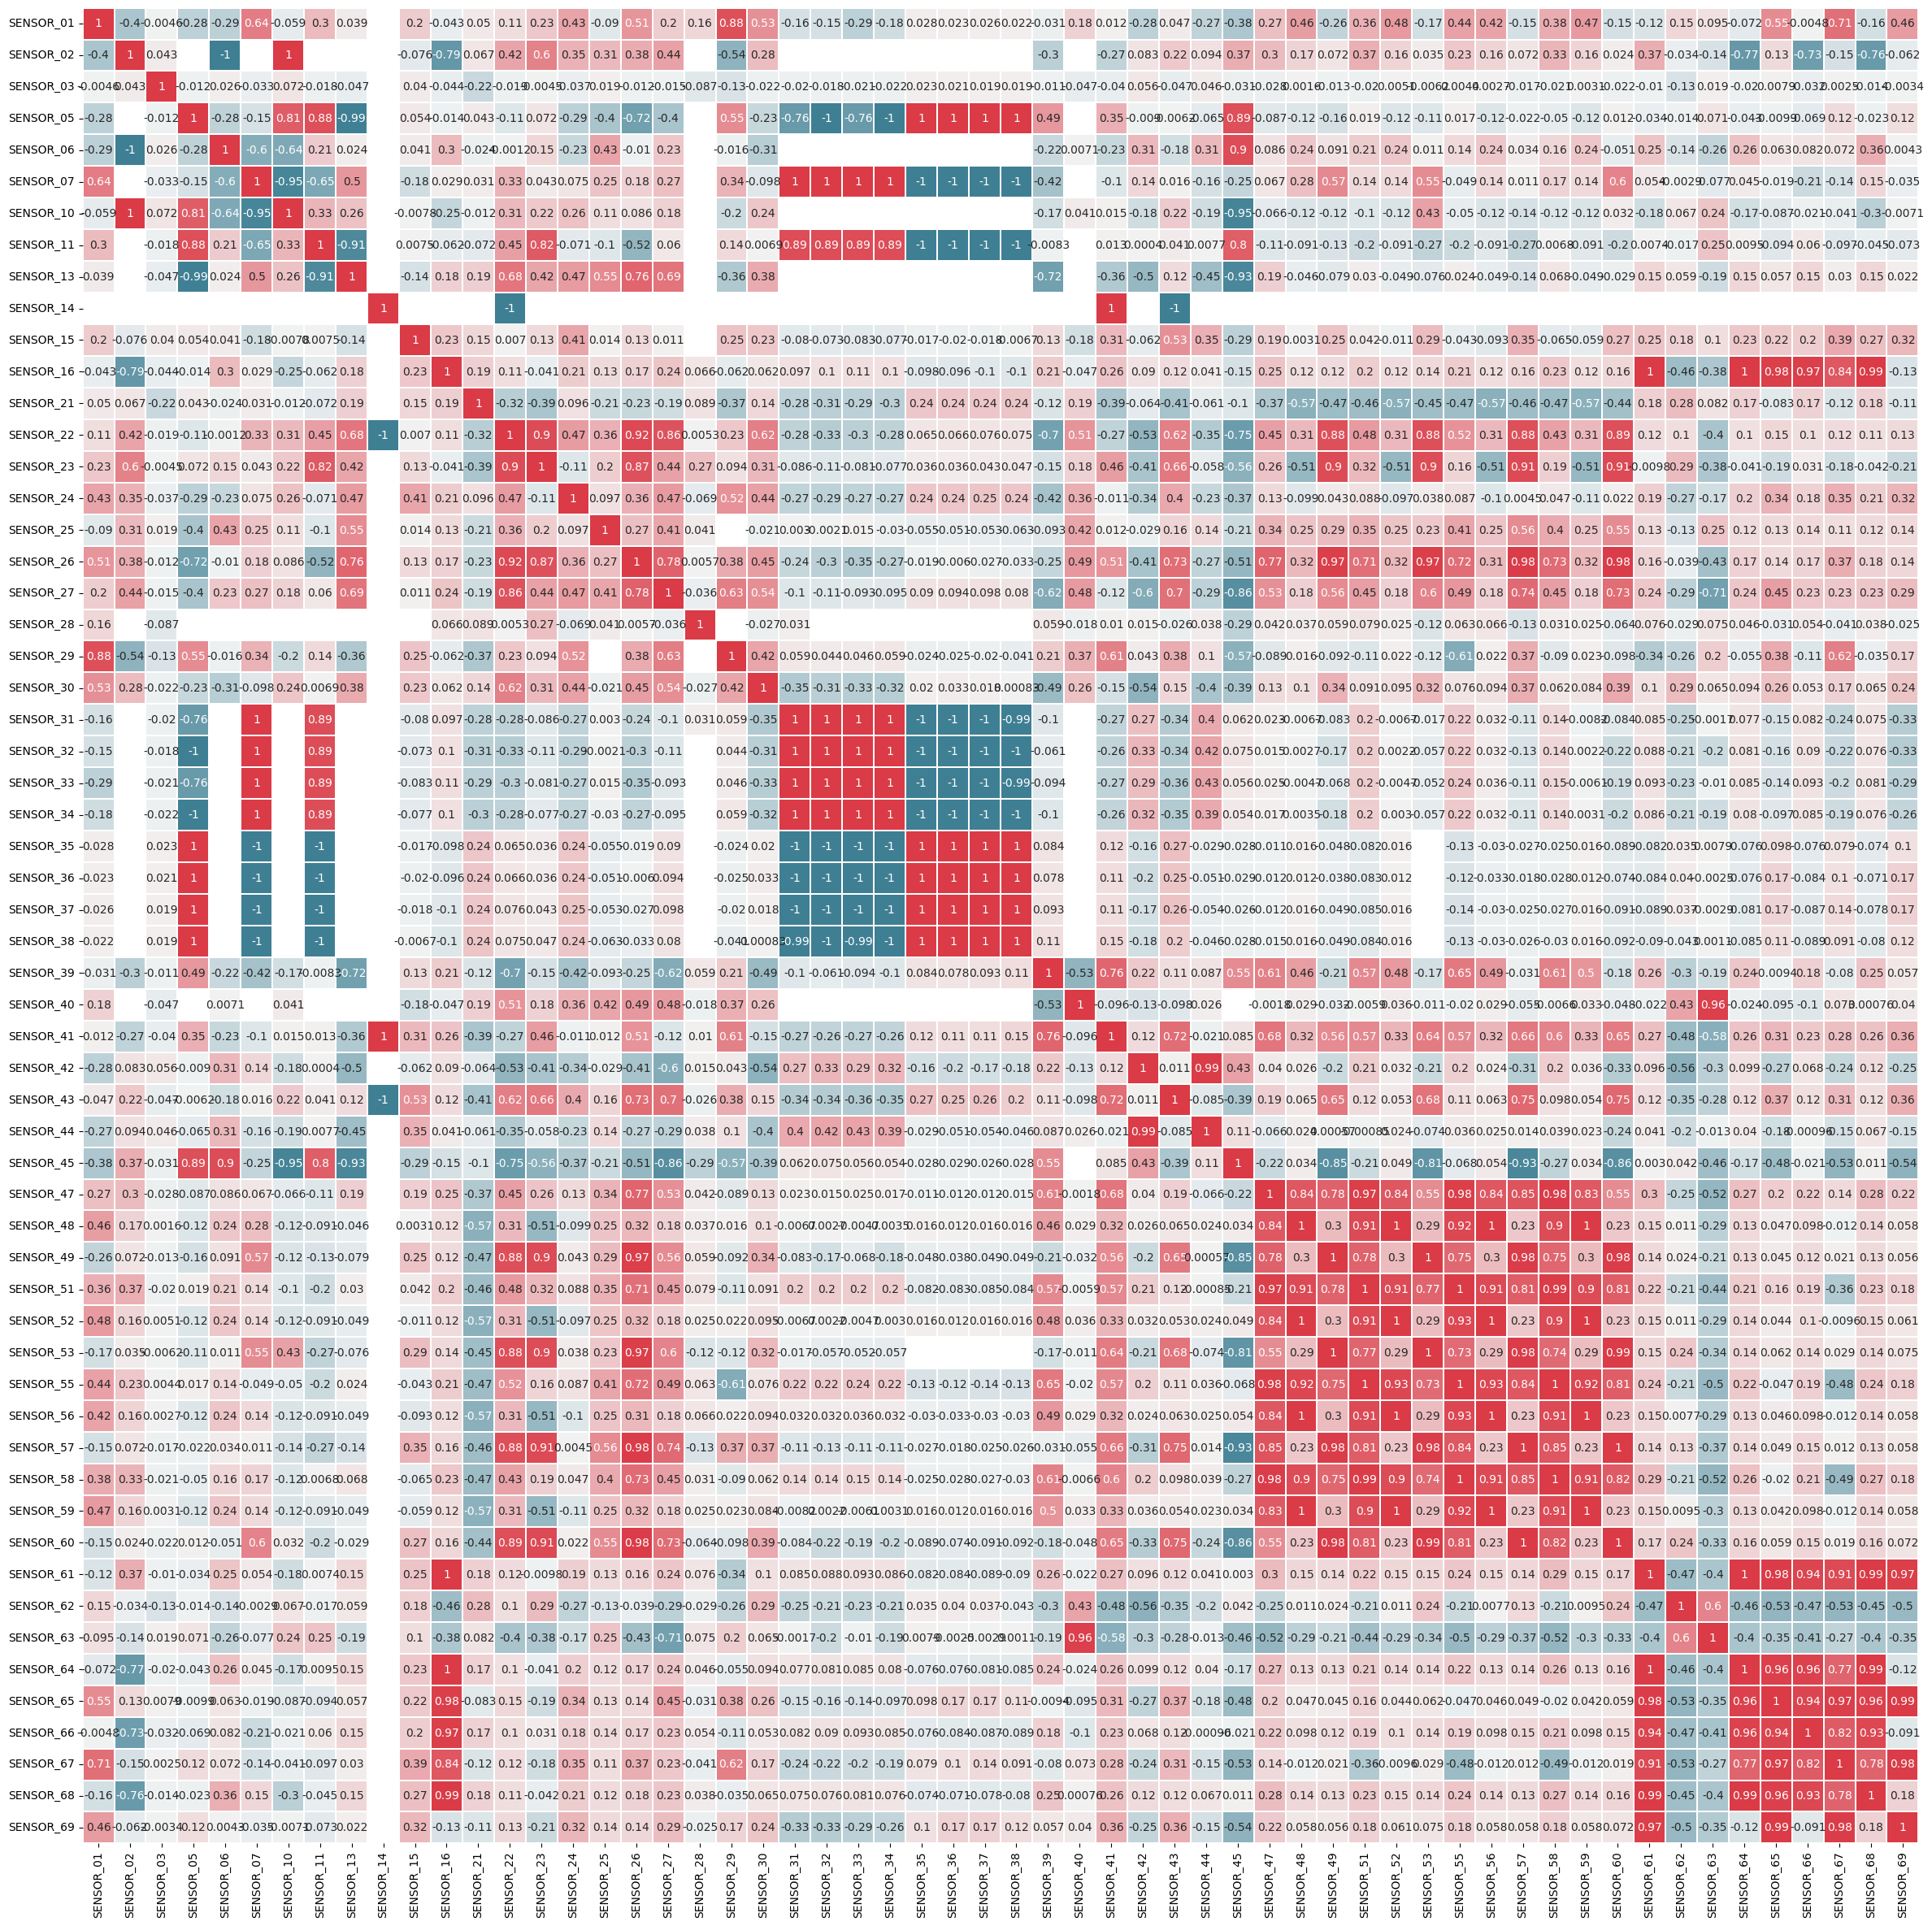

In [28]:
exclude = [
    "SENSOR_04", # No variation
    "SENSOR_08", # No variation
    "SENSOR_09", # No variation
    "SENSOR_12", # No variation
    "SENSOR_17", # No values
    "SENSOR_18", # No values
    "SENSOR_19", # No values
    "SENSOR_20", # No values
    "SENSOR_46", # No variation
    "SENSOR_50", # No variation
    "SENSOR_54", # No variation
]

plot_correlation(
    df_anon_high_res,
    subset=[tag for tag in df_anon_high_res["sensor_tag"].unique() if tag not in exclude],
    start=None,
    end=None,
    freq=None,
)

# 99. Scratch